In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sns.set()
%matplotlib inline

In [8]:
df = pd.read_csv('~/Downloads/bhasin1.xls')
df.head(12)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [6]:
df.info

<bound method DataFrame.info of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [7]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


<AxesSubplot:xlabel='Purchased', ylabel='count'>

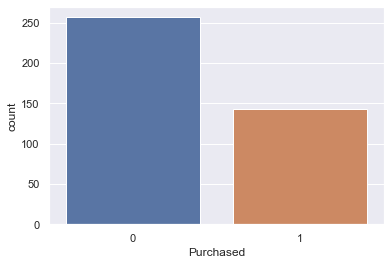

In [9]:
sns.countplot(x= 'Purchased', data = df)

<AxesSubplot:ylabel='Frequency'>

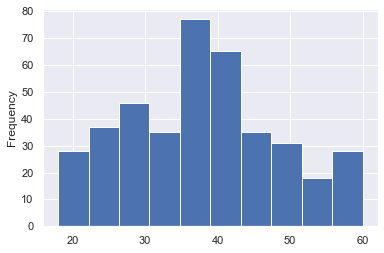

In [13]:
df['Age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

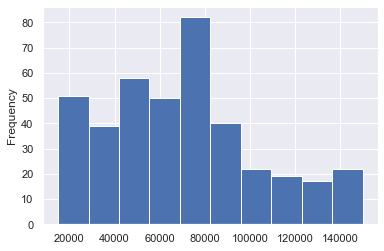

In [15]:
df['EstimatedSalary'].plot.hist()

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Age'>

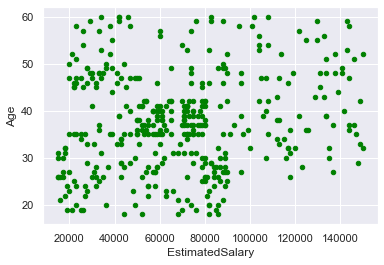

In [19]:
df.plot.scatter(x = 'EstimatedSalary', y = 'Age' , c = 'green')

In [20]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<AxesSubplot:xlabel='Purchased', ylabel='Age'>

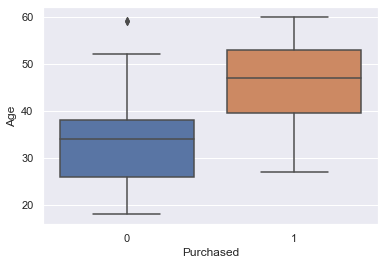

In [21]:
sns.boxplot(x='Purchased', y = 'Age' ,data = df)

<AxesSubplot:xlabel='Purchased', ylabel='EstimatedSalary'>

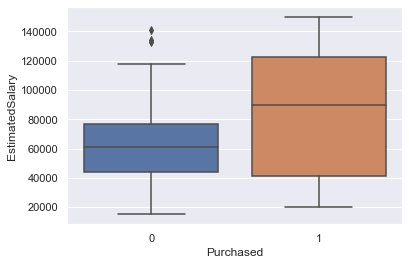

In [22]:
sns.boxplot(x='Purchased', y = 'EstimatedSalary' ,data = df)

In [28]:
df.drop('User ID', axis=1,inplace = True)

In [29]:
df.head(10)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
5,Male,27,58000,0
6,Female,27,84000,0
7,Female,32,150000,1
8,Male,25,33000,0
9,Female,35,65000,0


In [33]:
 sex = pd.get_dummies(df['Gender'],drop_first = True)
    

In [34]:
sex

,Male
0,1
1,1
2,0
3,0
4,1
...,...
395,0
396,1
397,0
398,1


In [36]:
df = pd.concat([df,sex],axis = 1)

In [37]:
df.head()

,Gender,Age,EstimatedSalary,Purchased,Male
0,Male,19,19000,0,1
1,Male,35,20000,0,1
2,Female,26,43000,0,0
3,Female,27,57000,0,0
4,Male,19,76000,0,1


In [38]:
df.drop('Gender',axis = 1,inplace = True)

In [39]:
df.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [41]:
x = df[['Age','EstimatedSalary','Male']]
y = df['Purchased']

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 17)



In [44]:
from sklearn.linear_model import LogisticRegression

In [51]:
model = LogisticRegression()

In [52]:
model.fit(x_train,y_train)

LogisticRegression()

In [53]:
predictions= model.predict(x_test)

In [54]:
from sklearn.metrics import classification_report

In [55]:
classification_report(y_test,predictions)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.68      1.00      0.81        82\n           1       0.00      0.00      0.00        38\n\n    accuracy                           0.68       120\n   macro avg       0.34      0.50      0.41       120\nweighted avg       0.47      0.68      0.55       120\n'

In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
confusion_matrix(y_test,predictions)

array([[82,  0],
       [38,  0]])

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
accuracy_score(y_test,predictions)

0.6833333333333333